<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

# Importing Metrics
from sklearn import metrics

%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-24 15:47:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.08s   

2020-05-24 15:47:19 (267 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head() 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

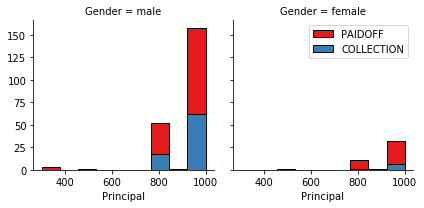

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

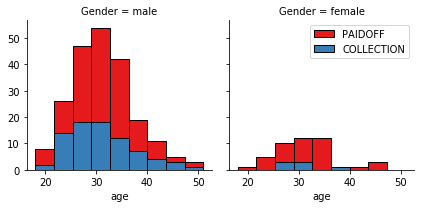

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

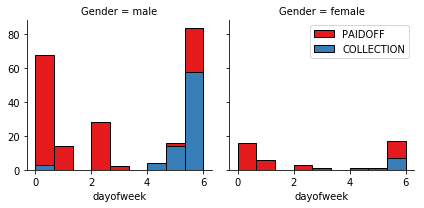

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [17]:
df[['Principal','terms','age','Gender','education', 'weekend']].head()

,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,High School or Below,0
1,1000,30,33,1,Bechalor,0
2,1000,15,27,0,college,0
3,1000,30,28,1,college,1
4,1000,30,29,0,college,1


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
# Crete the feature set without the Eductation field
Feature = df[['Principal','terms','age','Gender','weekend']]

# Concact the Hot Encoding Education columns in the feature set
Feature = pd.concat( [Feature, pd.get_dummies(df['education'])], axis=1 )

# Drop column that we don't need as a feature (it has no useful information, in fact it has 50% PAIDOFF and 50% COLLECTION)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head(100)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1
6,1000,30,28,0,1,0,0,1
7,800,15,26,0,1,0,0,1
8,300,7,29,0,1,0,0,1
9,1000,15,39,0,1,0,1,0


### Feature selection

Lets defind feature sets, X:

In [19]:
# X is our feauture set
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [20]:
# y is our label set
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

<b> Defining some useful functions we'll use below </b>

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')
    

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real labels')
    plt.xlabel('Predicted labels')

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Let's split X and y sets in Train Set and Test Set

In [23]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Creating the Test Set and the Training Set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) 

print("-------SHAPES-------")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("---")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)



-------SHAPES-------
X_train shape:  (276, 8)
y_train shape:  (276,)
---
X_test shape:  (70, 8)
y_test shape:  (70,)


<b> Finding the best value for K </b>

Now, we're going to create and test <b>different models</b> with <b>different values of k</b> in order to figure out with is the best value for k (<b>the k with the best accuracy</b>), for our specific dataset

In [24]:
# Importing KNN
from sklearn.neighbors import KNeighborsClassifier


# These will be the min and the max value for k that we'll try
from_k = 1
to_k = 50

test_accuracies = np.zeros( (to_k - from_k + 1) )


# best k value
best_k = 0

# accuracy for the best k 
best_accuracy = 0.0


# let's try differents k in order to figure out which one works better
for current_k in range(from_k, to_k + 1 ):
        
    #Training the model  using the training sets and the specific k we're looping on
    knn_model = KNeighborsClassifier(n_neighbors = current_k).fit(X_train,y_train)
    
    # Predicting the value using the test sets with the specific k we're looping on
    knn_prediction = knn_model.predict(X_test)

    # calculate the test accuracy
    test_accuracy = metrics.accuracy_score(y_test, knn_prediction)

    
    test_accuracies[current_k - 1 ] = test_accuracy
    
    # save the best k and the accuracy for the best k
    if(test_accuracy > best_accuracy):
        best_k = current_k
        best_accuracy = test_accuracy

<b>Lets' now print the accuracies for test sets</b>

In [25]:
print("TEST SET ACCURACIES")
print("---")
print(test_accuracies)

TEST SET ACCURACIES
---
[0.67142857 0.65714286 0.71428571 0.68571429 0.75714286 0.71428571
 0.78571429 0.75714286 0.75714286 0.67142857 0.7        0.72857143
 0.7        0.7        0.68571429 0.72857143 0.72857143 0.72857143
 0.7        0.68571429 0.71428571 0.68571429 0.7        0.7
 0.72857143 0.71428571 0.77142857 0.68571429 0.78571429 0.75714286
 0.78571429 0.74285714 0.78571429 0.78571429 0.78571429 0.75714286
 0.78571429 0.78571429 0.78571429 0.78571429 0.77142857 0.77142857
 0.77142857 0.78571429 0.77142857 0.78571429 0.78571429 0.78571429
 0.78571429 0.78571429]


<b> Let's plot the accuracies </b>

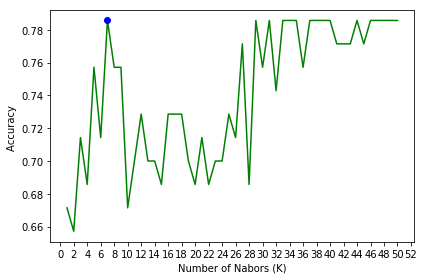

>>> The best K is 7 with an accuracy on the Test Set of 0.785714


In [26]:
plt.plot( range(from_k, to_k + 1), test_accuracies,'g')

plt.plot( best_k, best_accuracy, 'ob')

x_values = range(from_k, to_k + 1)

plt.ylabel('Accuracy ')

plt.xlabel('Number of Nabors (K)')

bins = (to_k - from_k + 1)

plt.locator_params(axis='x',nbins=bins)
plt.tight_layout()
plt.show()


print(">>> The best K is %i with an accuracy on the Test Set of %f"  %(best_k,  best_accuracy) )

<b> IMPORTANT: </b> Now we need to recreate the model using the best k found. It's important for use the best KNN set in the validation step

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = best_k).fit(X_train,y_train)

# Decision Tree

In [28]:
# We're going to use the same Test and Train set created before in order to compare the models on the same data
print("-------SHAPES-------")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("---")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


-------SHAPES-------
X_train shape:  (276, 8)
y_train shape:  (276,)
---
X_test shape:  (70, 8)
y_test shape:  (70,)


In [29]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=7)

#Training the model using the training sets
decision_tree_model.fit(X_train, y_train)
    
#Testing  the model using the x testing set
decision_tree_prediction = decision_tree_model.predict(X_test)
    
#calculate the test accuracy
test_accuracy = metrics.accuracy_score(y_test, decision_tree_prediction)

In [30]:
print(">>> Test Accuracy: ", test_accuracy)

>>> Test Accuracy:  0.7571428571428571


# Support Vector Machine

In [31]:
# We're going to use the same Test and Train set created before in order to compare the models on the same data
print("-------SHAPES-------")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("---")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

-------SHAPES-------
X_train shape:  (276, 8)
y_train shape:  (276,)
---
X_test shape:  (70, 8)
y_test shape:  (70,)


In [32]:
from sklearn import svm

# create and train the model with the train sets
svm_model = svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train) 

# test the model with X test set
svm_prediction = svm_model.predict(X_test)
svm_prediction [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Confusion matrix, without normalization
[[48  7]
 [11  4]]


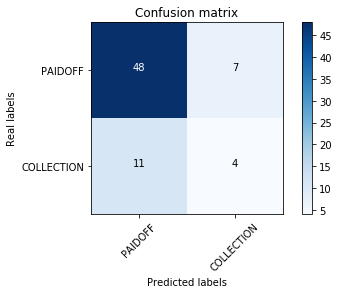

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_prediction, labels=['PAIDOFF','COLLECTION'])

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Logistic Regression

In [33]:
# We're going to use the same Test and Train set created before in order to compare the models on the same data
print("-------SHAPES-------")
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("---")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

-------SHAPES-------
X_train shape:  (276, 8)
y_train shape:  (276,)
---
X_test shape:  (70, 8)
y_test shape:  (70,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# create and train the model with the train sets
logistic_regression_model = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)

# test the model with X test set
logistic_regression_prediction = logistic_regression_model.predict(X_test)

Confusion matrix, without normalization
[[40 15]
 [11  4]]


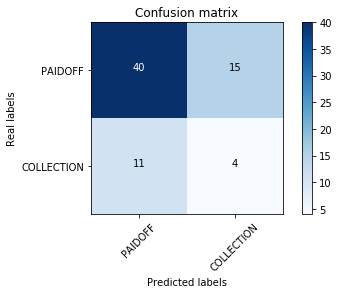

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logistic_regression_prediction, labels=['PAIDOFF','COLLECTION'])

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set

In [41]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [37]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Pre-processing the dataset in the same way has been done to the training set

In [55]:
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek


test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>test_df['Gender'].replace( to_replace=['male','female'], value=[0,1],inplace=True )


# Crete the feature set without the Eductation field
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]

# Concact the Hot Encoding Education columns in the feature set
Feature_test = pd.concat( [Feature_test, pd.get_dummies(test_df['education'])], axis=1 )

# Drop column that we don't need as a feature (it has no useful information, in fact it has 50% PAIDOFF and 50% COLLECTION)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

# X_test is our feauture set
X_validation = Feature_test

# y_test is our label set
y_validation = test_df['loan_status'].values


Feature_test.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [56]:
print("X shape: ", X_validation.shape)
print("y shape: ", y_validation.shape)

X shape:  (54, 8)
y shape:  (54,)


 ### Let's now caluculating the results of each models on this validation set
 <b> NOTE: </b> With the KNN model, be sure you've recreated the model with the best K we've found in one of the cells above. It is important to make the validation with the best K for the KNN model

In [61]:
def print_results(label, results):
    print(label)
    print("---")
    print(results)
    print("")

print_results("REAL VALIDATION VALUES", y_validation )

knn_validation = knn_model.predict(X_validation)
print_results("KNN RESULTS", knn_validation)

decision_tree_validation = decision_tree_model.predict(X_validation)
print_results("DECISION TREE RESULTS", decision_tree_validation)

svm_validation = svm_model.predict(X_validation)
print_results("SVM RESULTS", svm_validation)

logistic_regression_validation = logistic_regression_model.predict(X_validation)

logistic_regression_probs = logistic_regression_model.predict_proba(X_validation)

print_results("LOGISTIC REGRESSION RESULTS", logistic_regression_validation)




REAL VALIDATION VALUES
---
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION' 'COLLECTION'
 'COLLECTION' 'COLLECTION' 'COLLECTION']

KNN RESULTS
---
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF

### Let's calulate the indexes

In [62]:
knn_jaccard  = jaccard_similarity_score(y_validation, knn_validation)
decision_tree_jaccard = jaccard_similarity_score(y_validation, decision_tree_validation)
svm_jaccard = jaccard_similarity_score(y_validation, svm_validation)
logistic_regression_jaccard = jaccard_similarity_score(y_validation, logistic_regression_validation)


knn_f1 =  f1_score(y_validation, knn_validation, average='weighted')
decision_tree_f1 = f1_score(y_validation, decision_tree_validation, average='weighted')
svm_f1 = f1_score(y_validation, svm_validation, average='weighted')
logistic_regression_f1 = f1_score(y_validation, logistic_regression_validation, average='weighted')


log_loss_score = log_loss(y_validation, logistic_regression_probs, normalize=True)

from tabulate import tabulate

knn_row = ['KNN', round(knn_jaccard,2) , round(knn_f1,2) , "n/a"]
decision_tree_row = ['Decision Tree', round(decision_tree_jaccard,2) , round(decision_tree_f1,2) , "n/a"]
svm_row = ['SVM', round(svm_jaccard,2) , round(svm_f1,2), "n/a"]
logistic_regression_row = ['Logistic Regression', round(logistic_regression_jaccard,2), round(logistic_regression_f1,2) , round(log_loss_score,2)]

print(tabulate([ knn_row, decision_tree_row, svm_row, logistic_regression_row], headers=['Jaccard', 'F1-score', 'LogLoss']))


                       Jaccard    F1-score  LogLoss
-------------------  ---------  ----------  ---------
KNN                       0.74        0.63  n/a
Decision Tree             0.72        0.73  n/a
SVM                       0.74        0.63  n/a
Logistic Regression       0.26        0.11  1.06


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.74    | 0.63     | NA      |
| Decision Tree      | 0.72    | 0.73     | NA      |
| SVM                | 0.74    | 0.63     | NA      |
| LogisticRegression | 0.26    | 0.11     | 1.06    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>